![LogoUC3M](https://www.fundacion.uc3m.es/wp-content/uploads/2018/11/Logo-UC3M-nuevo.png)

### Aprendizaje Automático · Grado en Ingeniería Informática · Curso 2022/23
# Tutorial 0: Introducción a Pandas

# 6 Data in Pandas

In the previous sessions, we have learned how to handle Numpy arrays that can be used to efficiently perform numerical calculations. Those arrays are however homogeneous structures i.e. they can only contain one type of data. Also, even if we have a single type of data, the different rows or columns of an array do not have labels, making it difficult to track what they contain. For such cases, we need a structure closer to a table as can be found in Excel, and these structures are implemented by the package Pandas.

But why can't we simply use Excel then? While Excel is practical to browse through data, it is very cumbersome to use to combine, re-arrange and thoroughly analyze data: code is hidden and difficult to share, there's no version control, it's difficult to automate tasks, the manual clicking around leads to mistakes etc.

In this notebook, you will learn how to handle tabular data with Pandas, a Python package widely used in the scientific and data science areas. You will learn how to create and import tables, how to combine them, modify them, do statistical analysis on them and finally how to use them to easily create complex visualizations.

So that you see where this leads, we start with a short example of how Pandas can be used in a project. We look here at data provided openly by the Swiss National Science Foundation about grants attributed since 1975.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

## 6.1 Importing data

Before anything, we need access to the data. We can either manually download them and then use the path to read the data or directly use the url. The latter has the advantage that if you have an evolving source of data, these will always be up to date:

In [5]:
# local import
projects_path = 'https://raw.githubusercontent.com/emiliomartin84/Machine_Learning_Uc3m/main/Data/P3_GrantExport.csv'
persons_path = 'https://raw.githubusercontent.com/emiliomartin84/Machine_Learning_Uc3m/main/Data/P3_PersonExport.csv'

projects = pd.read_csv(projects_path, sep = ';')

Then we can have a brief look at the table itself that Jupyter displays in a formated way and limit the view to the 5 first rows using ```head()```:

In [6]:
projects.head(5)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.00,NaN
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.00,NaN
4,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.00,NaN


## 6.2 Exploring data

Pandas offers a variety of tools to compile information about data, and that compilation can be done very efficiently without the need for loops, conditionals etc.

For example we can quickly count how many times each University appear in that table. We just use the ```value_counts()``` method for that:

In [7]:
projects['University'].value_counts().head(10)

Institution abroad - IACH      13348
University of Zurich - ZH       8170
University of Geneva - GE       7385
ETH Zurich - ETHZ               7278
University of Berne - BE        6445
University of Basel - BS        5560
EPF Lausanne - EPFL             5174
University of Lausanne - LA     4944
Unassignable - NA               2642
University of Fribourg - FR     2535
Name: University, dtype: int64

Then we can very easily plot the resulting information, either using directly Pandas or a more advanced library like Seaborn, plotnine or Altair.

Here first with plain Pandas (using Matplotlib under the hood):

<AxesSubplot: >

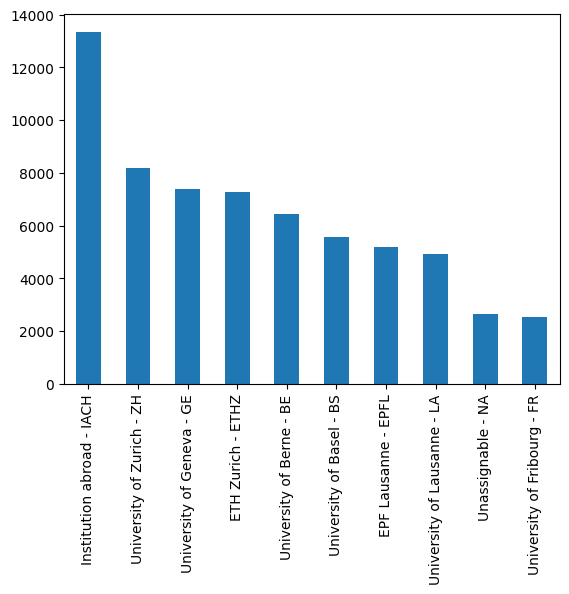

In [8]:
projects['University'].value_counts().head(10).plot(kind='bar')

## 6.3 Handling different data types

Unlike Numpy arrays, Pandas can handle a variety of different data types in a dataframe. For example it is very efficient at dealing with dates. We see that our table contains e.g. a ```Start Date```. We can turn this string into an actual date:

In [21]:
projects['Start'] = pd.to_datetime(projects['Start Date'], dayfirst=True)
projects['Year'] = projects.start.apply(lambda x: x.year)

In [22]:
projects.loc[0].start

Timestamp('1975-10-01 00:00:00')

In [23]:
projects.loc[0].Year

1975.0

## 6.4 Data wrangling, aggregation and statistics

Pandas is very efficient at wrangling and aggregating data, i.e. grouping several elements of a table to calculate statistics on them. For example we first need here to convert the ```Approved Amount``` to a numeric value. Certain rows contain text (e.g. "not applicable") and we force the conversion:

In [24]:
projects['Approved Amount'] = pd.to_numeric(projects['Approved Amount'], errors='coerce')

Then we want to extract the type of filed without subfields e.g. "Humanities" instead of "Humanities and Social Sciences;Theology & religion". For that we can create a custom function and apply it to an entire column:

In [44]:
science_types = ['Humanities', 'Mathematics', 'Biology']

def get_field (full_field):
    if type(full_field) != str:
        return None
    for field in science_types:
        if field in full_field:
            return field

projects['Field'] = projects['Discipline Name Hierarchy'].apply(get_field)                                        

Then we group the data by discipline and year, and calculate the mean of each group:

In [45]:
aggregated = projects.groupby(['Institution Country', 'Year', 'Field'], as_index=False).mean(numeric_only=True)

Finally we can use Seaborn to plot the data by "Field" using just keywords to indicate what the axes and colours should mean (following some principles of the grammar of graphics):

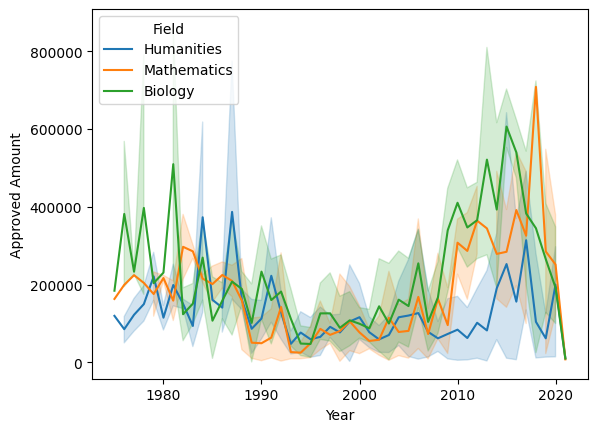

In [46]:
sns.lineplot(data=aggregated, x='Year', y='Approved Amount', hue='Field');

Note that here, axis labelling, colorouring, legend, interval of confidence have been done automatically based on the content of the dataframe.

We see a drastic augmentation around 2010: let's have a closer look. We can here again group data by year and funding type and calculate the total funding:

In [33]:
grouped = projects.groupby(['Year','Funding Instrument Hierarchy']).agg(
    TotalSum=pd.NamedAgg(column='Approved Amount', aggfunc='sum')).reset_index()

In [34]:
grouped

,Year,Funding Instrument Hierarchy,TotalSum
0,1975.0,Project funding,32124534.0
1,1975.0,Science communication,44600.0
2,1976.0,Programmes;National Research Programmes (NRPs),268812.0
3,1976.0,Project funding,96620284.0
4,1976.0,Science communication,126939.0
...,...,...,...
378,2020.0,Programmes;r4d (Swiss Programme for Research o...,195910.0
379,2020.0,Project funding,193568294.0
380,2020.0,Project funding;Project funding (special),19239681.0
381,2020.0,Science communication,3451740.0


Now, for each year we keep only the 5 largest funding types to be able to plot them:

In [35]:
group_sorted = grouped.groupby('Year', as_index=False) \
                      .apply(lambda x: (x.groupby('Funding Instrument Hierarchy') \
                                         .sum() \
                                         .sort_values('TotalSum', ascending=False)) \
                                         .head(5)) \
                      .reset_index()

Finally, we only keep year in the 2000's:

In [37]:
instruments_by_year = group_sorted[(group_sorted.Year > 2005) & (group_sorted.Year < 2012)]

<AxesSubplot: xlabel='Year', ylabel='TotalSum'>

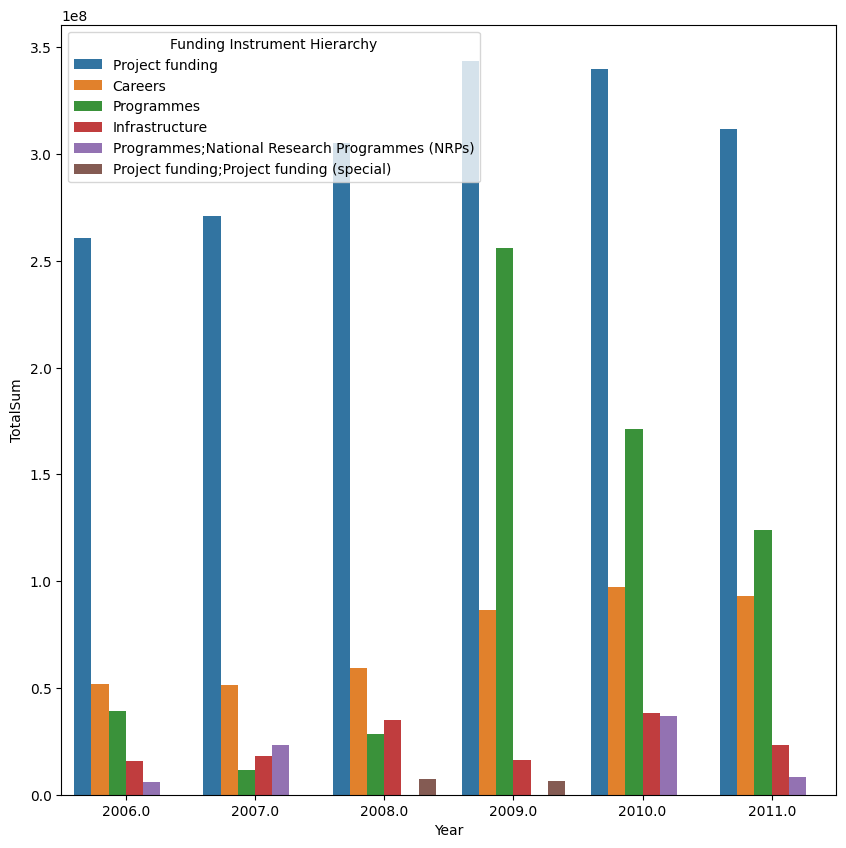

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(data=instruments_by_year,
            x='Year', y='TotalSum', hue='Funding Instrument Hierarchy')

We see that the main change, is the sudden increase in funding for national research programs.

# 7. Pandas objects

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Python has a series of data containers (list, dicts etc.) and Numpy offers multi-dimensional arrays, however none of these structures offers a simple way neither to handle tabular data, nor to easily do standard database operations. This is why Pandas exists: it offers a complete ecosystem of structures and functions dedicated to handle large tables with inhomogeneous contents.

In this first chapter, we are going to learn about the two main structures of Pandas: Series and Dataframes.

## 7.1 Series

### 7.1.1 Simple series

Series are the Pandas version of 1-D Numpy arrays. We are rarely going to use them directly, but they often appear implicitly when handling data from the more general Dataframe structure. We therefore only give here basics. 

To understand Series' specificities, let's create one. Usually Pandas structures (Series and Dataframes) are created from other simpler structures like Numpy arrays or dictionaries:

In [47]:
numpy_array = np.array([4,8,38,1,6])

The function ```pd.Series()``` allows us to convert objects into Series:

In [48]:
pd_series = pd.Series(numpy_array)
pd_series

0     4
1     8
2    38
3     1
4     6
dtype: int64

The underlying structure can be recovered with the ```.values``` attribute: 

In [49]:
pd_series.values

array([ 4,  8, 38,  1,  6])

Otherwise, indexing works as for regular arrays:

In [50]:
pd_series[1]

8

### 7.1.2 Indexing

On top of accessing values in a series by regular indexing, one can create custom indices for each element in the series:

In [51]:
pd_series2 = pd.Series(numpy_array, index=['a', 'b', 'c', 'd','e'])

In [52]:
pd_series2

a     4
b     8
c    38
d     1
e     6
dtype: int64

Now a given element can be accessed either by using its regular index:

In [53]:
pd_series2[1]

8

or its chosen index:

In [54]:
pd_series2['b']

8

A more direct way to create specific indexes is to transform as dictionary into a Series:

In [55]:
composer_birth = {'Mahler': 1860, 'Beethoven': 1770, 'Puccini': 1858, 'Shostakovich': 1906}

In [56]:
pd_composer_birth = pd.Series(composer_birth)
pd_composer_birth

Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
dtype: int64

In [57]:
pd_composer_birth['Puccini']

1858

## 7.2 Dataframes

In most cases, one has to deal with more than just one variable, e.g. one has the birth year and the death year of a list of composers. Also one might have different types of information, e.g. in addition to numerical variables (year) one might have string variables like the city of birth. The Pandas structure that allow one to deal with such complex data is called a Dataframe, which can somehow be seen as an aggregation of Series with a common index.

### 7.2.1 Creating a Dataframe

To see how to construct such a Dataframe, let's create some more information about composers:

In [59]:
composer_death = pd.Series({'Mahler': 1911, 'Beethoven': 1827, 'Puccini': 1924, 'Shostakovich': 1975})
composer_city_birth = pd.Series({'Mahler': 'Kaliste', 'Beethoven': 'Bonn', 'Puccini': 'Lucques', 'Shostakovich': 'Saint-Petersburg'})

Now we can combine multiple series into a Dataframe by precising a variable name for each series. Note that all our series need to have the same indices (here the composers' name):

In [60]:
composers_df = pd.DataFrame({'birth': pd_composer_birth, 'death': composer_death, 'city': composer_city_birth})
composers_df

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


A more common way of creating a Dataframe is to construct it directly from a dictionary of lists where each element of the dictionary turns into a column:

In [61]:
dict_of_list = {'birth': [1860, 1770, 1858, 1906], 'death':[1911, 1827, 1924, 1975], 
 'city':['Kaliste', 'Bonn', 'Lucques', 'Saint-Petersburg']}

In [62]:
pd.DataFrame(dict_of_list)

,birth,death,city
0,1860,1911,Kaliste
1,1770,1827,Bonn
2,1858,1924,Lucques
3,1906,1975,Saint-Petersburg


However we now lost the composers name. We can enforce it by providing, as we did before for the Series, a list of indices:

In [63]:
pd.DataFrame(dict_of_list, index=['Mahler', 'Beethoven', 'Puccini', 'Shostakovich'])

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


### 7.2.2 Accessing values

There are multiple ways of accessing values or series of values in a Dataframe. Unlike in Series, a simple bracket gives access to a column and not an index, for example:

In [64]:
composers_df['city']

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

returns a Series. Alternatively one can also use the *attributes* synthax and access columns by using:

In [65]:
composers_df.city

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

The attributes syntax has some limitations, so in case something does not work as expected, revert to the brackets notation.

When specifiying multiple columns, a DataFrame is returned:

In [66]:
composers_df[['city', 'birth']]

,city,birth
Mahler,Kaliste,1860
Beethoven,Bonn,1770
Puccini,Lucques,1858
Shostakovich,Saint-Petersburg,1906


One of the important differences with a regular Numpy array is that here, regular indexing doesn't work:

In [68]:
composers_df[0,0]

KeyError: (0, 0)

Instead one has to use either the ```.iloc[]``` or the ```.loc[]``` method. ```.iloc[]``` can be used to recover the regular indexing:

In [109]:
 composers_df.iloc[0,1]

1911

While ```.loc[]``` allows one to recover elements by using the **explicit** index, on our case the composers name:

In [69]:
composers_df.loc['Mahler','death']

1911

**Remember that ```loc``` and ```iloc``` use brackets [] and not parenthesis ().**

Numpy style indexing works here too

In [70]:
composers_df.iloc[1:3,:]

,birth,death,city
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques


If you are working with a large table, it might be useful to sometimes have a list of all the columns. This is given by the ```.keys()``` attribute:

In [71]:
composers_df.keys()

Index(['birth', 'death', 'city'], dtype='object')

### 7.2.3 Adding columns

It is very simple to add a column to a Dataframe. One can e.g. just create a column a give it a default value that we can change later:

In [72]:
composers_df['country'] = 'default'

In [73]:
composers_df

,birth,death,city,country
Mahler,1860,1911,Kaliste,default
Beethoven,1770,1827,Bonn,default
Puccini,1858,1924,Lucques,default
Shostakovich,1906,1975,Saint-Petersburg,default


Or one can use an existing list:

In [74]:
country = ['Austria','Germany','Italy','Russia']

In [75]:
composers_df['country2'] = country

In [76]:
composers_df

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,default,Austria
Beethoven,1770,1827,Bonn,default,Germany
Puccini,1858,1924,Lucques,default,Italy
Shostakovich,1906,1975,Saint-Petersburg,default,Russia


# 8. Importing/export, basic plotting

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We have seen in the previous chapter what structures are offered by Pandas and how to create them. Another very common way of "creating" a Pandas Dataframe is by importing a table from another format like CSV or Excel.

## 8.1 Simple import

An Excel table is provided in [composers.xlsx](composers.xlsx) and can be read with the ```read_excel``` function. There are many more readers for other types of data (csv, json, html etc.) but we focus here on Excel.

In [80]:
composers_path = 'https://raw.githubusercontent.com/emiliomartin84/Machine_Learning_Uc3m/main/Data/composers.xlsx'
pd.read_excel(composers_path)

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


The reader automatically recognized the heaers of the file. However it created a new index. If needed we can specify which column to use as header:

In [81]:
pd.read_excel(composers_path, index_col='composer')

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


If we open the file in Excel, we see that it is composed of more than one sheet. Clearly, when not specifying anything, the reader only reads the first sheet. However we can specify a sheet:

In [84]:
specific_sheet = pd.read_excel(composers_path, index_col='composer', sheet_name='Sheet2')

In [85]:
specific_sheet

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg
Sibelius,10.0,unknown,unknown
Haydn,NaN,NaN,Röhrau


For each reader, there is a long list of options to specify how the file should be read. We can see all these options using the help (see below). Imagine that our tables contains a title and unnecessary rows: we can use the ```skiprows``` argument. Imagine you have dates in your table: you can use the ```date_parser``` argument to specify how to format them etc.

In [123]:
# Sse shift+tab within the parenthesis to see optional arguments
#pd.read_excel()

## 8.2 Handling unknown values

As you can see above, some information is missing. Some missing values are marked as "unknown" while other are NaN. NaN is the standard symbol for unknown/missing values and is understood by Pandas while "unknown" is just seen as text. This is impractical as now we have e.g. columns with a mix of numbers and text which will make later computations difficult. What we would like to do is to replace all "irrelevant" values with the standard NaN symbol that says "no information".

Let's first do a regular import:

In [86]:
import1 = pd.read_excel(composers_path, index_col='composer', sheet_name='Sheet2')
import1

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg
Sibelius,10.0,unknown,unknown
Haydn,NaN,NaN,Röhrau


If we look now at one column, we can see that columns have been imported in different ways. One column is an object, i.e. mixed types, the other contains floats:

In [88]:
import1.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Sibelius          10.0
Haydn              NaN
Name: birth, dtype: float64

In [89]:
import1.death

composer
Mahler             1911
Beethoven          1827
Puccini            1924
Shostakovich       1975
Sibelius        unknown
Haydn               NaN
Name: death, dtype: object

If we want to do calculations, for example getting summary information using ```describe()``` we have a problem: the ```death``` column is skipped because no calculation can be done with strings:

In [90]:
import1.describe()

,birth
count,5.000000
mean,1480.800000
std,823.674207
min,10.000000
25%,1770.000000
50%,1858.000000
75%,1860.000000
max,1906.000000


Now we specify that 'unknown' should be a NaN value:

In [91]:
import2 = pd.read_excel(composers_path, index_col='composer', sheet_name='Sheet2', na_values=['unknown'])
import2

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,10.0,NaN,NaN
Haydn,NaN,NaN,Röhrau


And now computations are again possible, as Pandas knows how to deal with NaNs:

In [92]:
import2.describe()

,birth,death
count,5.000000,4.000000
mean,1480.800000,1909.250000
std,823.674207,61.396933
min,10.000000,1827.000000
25%,1770.000000,1890.000000
50%,1858.000000,1917.500000
75%,1860.000000,1936.750000
max,1906.000000,1975.000000


**Handling bad or missing values is a very important part of data science**. Taking care of the most common occurrences at import is a good solution.

## 8.3 Column types

We see above that the birth column has been "classified" as a float. However we know that this is not the case, it's just an integer. Here again, we can specify the column type already at import time using the dtype option and a dictionary:

In [95]:
import2 = pd.read_excel(composers_path, 
                        index_col='composer',
                        sheet_name='Sheet1', 
                        na_values=['unknown'],
                        dtype={'composer': str, 'birth': np.int32, 'death': np.int32, 'city': str})

In [96]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

## 8.4 Modifications after import

Of course we don't have to do all these adjustement at import time. We can also do a default import and check what has to be corrected afterward.

### 8.4.1 Create NaNs

If we missed some bad values at import we can just replace all those directly in the dataframe. We can achieve that by using the ```replace()``` method and specifying what should be replaced:

In [97]:
import1

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg
Sibelius,10.0,unknown,unknown
Haydn,NaN,NaN,Röhrau


In [98]:
import_nans = import1.replace('unknown', np.nan)
import_nans.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Sibelius          10.0
Haydn              NaN
Name: birth, dtype: float64

Note that when we fix "bad" values, e.g. here the "unknown" text value with NaNs, Pandas automatically adjust the type of the column, allowing us for exampel to later do mathemtical operations.

In [99]:
import1.death.dtype

dtype('O')

In [100]:
import_nans.death.dtype

dtype('float64')

### 8.4.2 Changing the type

We can also change the type of a column on an existing Dataframe with the same command as in Numpy:

In [101]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

In [102]:
import2.birth.astype('float')

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Name: birth, dtype: float64

If we look again at import2:

In [103]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

we see that we didn't actually change the type. Changes on a Dataframe are only effective if we reassign the column: 

In [104]:
import2.birth = import2.birth.astype('float')

In [105]:
import2.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Name: birth, dtype: float64

## 8.5 Export

You can easily export a Dataframe that you worked on. Most commonly you will export it in a common format like CSV:

In [106]:
import2.to_csv('mydataframe.csv')

If you have a complex dataframe that e.g. contains lists, you can save it as a *pickle* object, a specific Python format that allows one to save complex data:

In [107]:
import2.to_pickle('my_dataframe.pkl')

You can reload this type of data via the pickle loading function of Pandas:

In [108]:
import3 = pd.read_pickle('my_dataframe.pkl')

In [109]:
import3

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg


## 8.6 Plotting

We will learn more about plotting later, but let's see here some possibilities offered by Pandas. Pandas builds on top of Matplotlib but exploits the knowledge included in Dataframes to improve the default output. Let's see with a simple dataset.

In [111]:
composers = pd.read_excel(composers_path, sheet_name='Sheet5')

We can pass Series to Matplotlib which manages to understand them. Here's a default scatter plot:

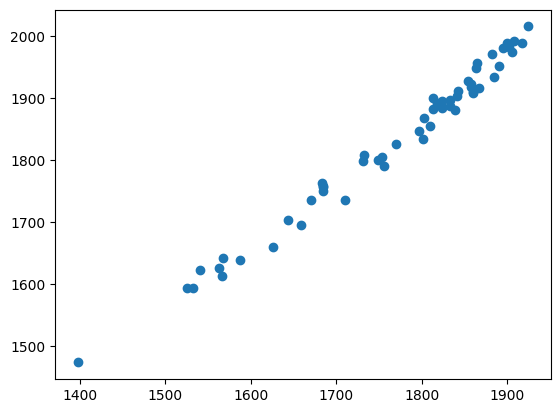

In [112]:
plt.plot(composers.birth, composers.death, 'o')
plt.show()

Now we look at the default Pandas output. Different types of plots are accessible when using the ```data_frame.plot``` function via the ```kind``` option. The variables to plot are column names passed as keywords instead of whole series like in Matplotlib:

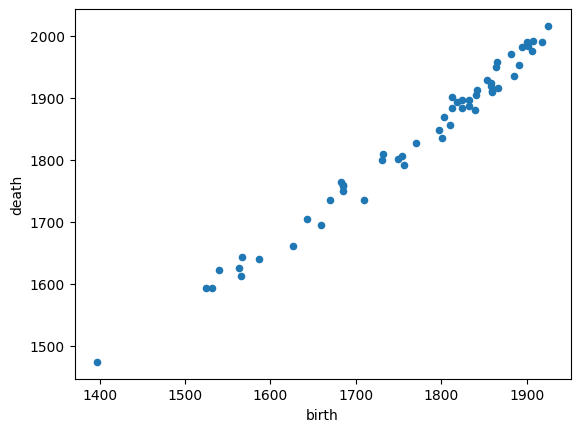

In [113]:
composers.plot(x='birth', y='death', kind='scatter')
plt.show()

We see that the plot automatically gets axis labels. Another gain is that some obvious options like setting a title are directly accesible when creating the plot:

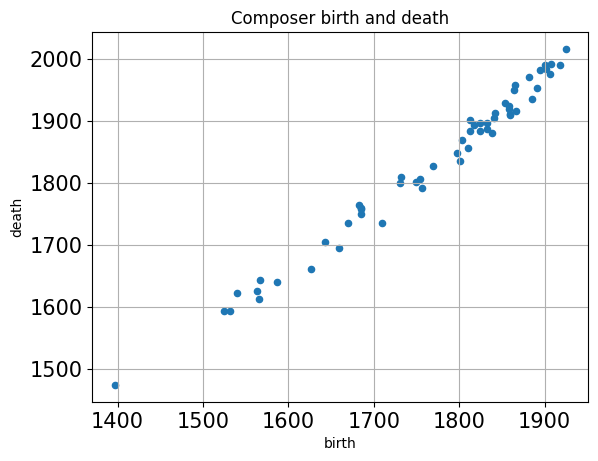

In [114]:
composers.plot(x='birth', y='death', kind='scatter',
               title='Composer birth and death', grid=True, fontsize=15)
plt.show()

One can add even more information on the plot by using more arguments used in a similar way as a grammar of graphics. For example we can color the scatter plot by periods:

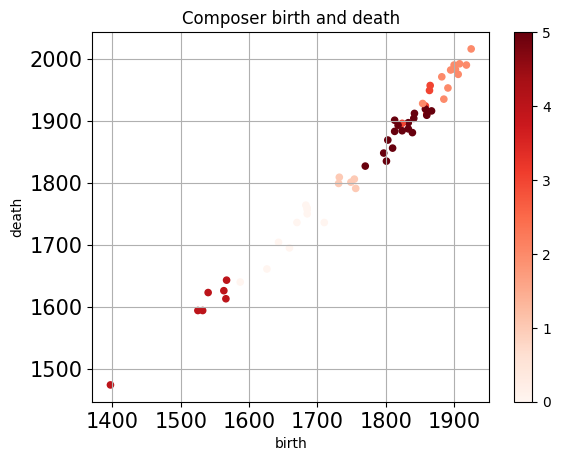

In [115]:
composers.plot(x='birth', y='death', kind='scatter',
               c=composers.period.astype('category').cat.codes, colormap='Reds', 
               title='Composer birth and death', grid=True, fontsize=15)
plt.show()

Here you see already a limitation of the plotting library. To color dots by the period category, we had to turn the latter into a series of numbers. We could then rename those to improve the plot, but it's better to use more specialized packages such as Seaborn which allow to realize this kind of plot easily:

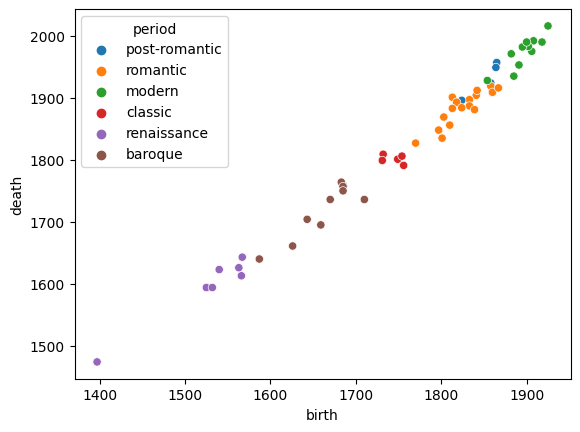

In [116]:
sns.scatterplot(data=composers, x='birth', y='death', hue='period')
plt.show()

Some additional plotting options are available in the ```plot()``` module. For example histograms:

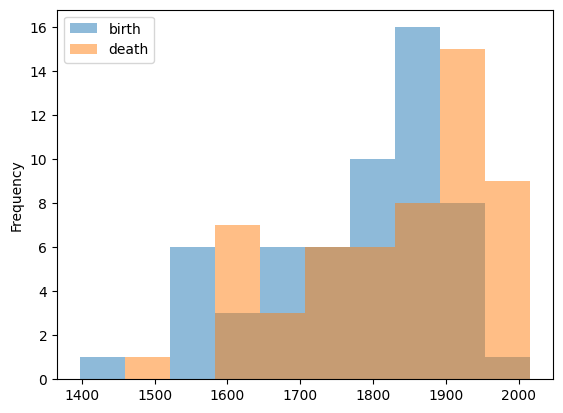

In [117]:
composers.plot.hist(alpha=0.5)
plt.show()

Here you see again the gain from using Pandas: without specifying anything, Pandas made a histogram of the two columns containing numbers, labelled the axis and even added a legend to the plot.

All these features are very nice and very helpful when exploring a dataset. When analyzing data in depth and creating complex plots, Pandas's plotting might however be limiting and other options such as Seaborn or Plotnine can be used.

Finally, all plots can be "styled" down to the smallest detail, either by using Matplotlib options or by directly applying a style e.g.:

In [118]:
plt.style.use('ggplot')

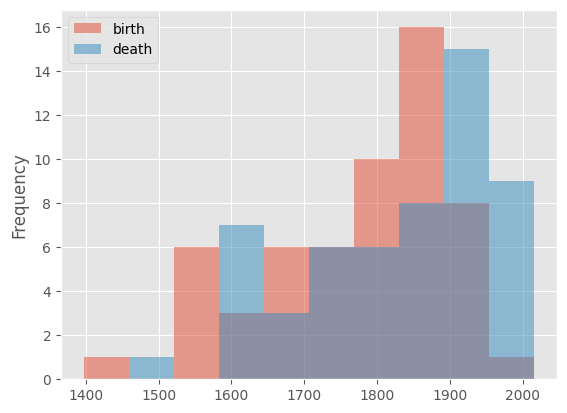

In [120]:
composers.plot.hist(alpha=0.5)
plt.show()

# 9. Operations with Pandas objects

In [121]:
import pandas as pd
import numpy as np

One of the great advantages of using Pandas to handle tabular data is how simple it is to extract valuable information from them. Here we are going to see various types of operations that are available for this.

## 9.1 Matrix types of operations

The strength of Numpy is its natural way of handling matrix operations, and Pandas reuses a lot of these features. For example one can use simple mathematical operations to operate at the cell level: 

In [123]:
compo_pd = pd.read_excel(composers_path)
compo_pd

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [124]:
compo_pd['birth']*2

0    3720
1    3540
2    3716
3    3812
Name: birth, dtype: int64

In [125]:
np.log(compo_pd['birth'])

0    7.528332
1    7.478735
2    7.527256
3    7.552762
Name: birth, dtype: float64

Here we applied functions only to series. Indeed, since our Dataframe contains e.g. strings, no operation can be done on it:

In [166]:
#compo_pd+1

If however we have a homogenous Dataframe, this is possible:

In [126]:
compo_pd[['birth','death']]

,birth,death
0,1860,1911
1,1770,1827
2,1858,1924
3,1906,1975


In [127]:
compo_pd[['birth','death']]*2

,birth,death
0,3720,3822
1,3540,3654
2,3716,3848
3,3812,3950


## 9.2 Column operations

There are other types of functions whose purpose is to summarize the data. For example the mean or standard deviation. Pandas by default applies such functions column-wise and returns a series containing e.g. the mean of each column:

In [132]:
np.mean(compo_pd)

/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


birth    1848.50
death    1909.25
dtype: float64

Note that columns for which a mean does not make sense, like the city are discarded.
A series of common functions like mean or standard deviation are directly implemented as methods and can be accessed in the alternative form:

In [133]:
compo_pd.describe()

,birth,death
count,4.000000,4.000000
mean,1848.500000,1909.250000
std,56.836021,61.396933
min,1770.000000,1827.000000
25%,1836.000000,1890.000000
50%,1859.000000,1917.500000
75%,1871.500000,1936.750000
max,1906.000000,1975.000000


In [134]:
compo_pd.std()

/var/folders/f0/tchddh3d1792rbf3s4rssvqh0000gn/T/ipykernel_59283/237597691.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  compo_pd.std()


birth    56.836021
death    61.396933
dtype: float64

If you need the mean of only a single column you can of course chains operations:

In [135]:
compo_pd.birth.mean()

1848.5

## 9.3 Operations between Series

We can also do computations with multiple series as we would do with Numpy arrays:

In [136]:
compo_pd['death']-compo_pd['birth']

0    51
1    57
2    66
3    69
dtype: int64

We can even use the result of this computation to create a new column in our Dataframe:

In [137]:
compo_pd

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [138]:
compo_pd['age'] = compo_pd['death']-compo_pd['birth']

In [139]:
compo_pd

,composer,birth,death,city,age
0,Mahler,1860,1911,Kaliste,51
1,Beethoven,1770,1827,Bonn,57
2,Puccini,1858,1924,Lucques,66
3,Shostakovich,1906,1975,Saint-Petersburg,69


## 9.4 Other functions

Sometimes one needs to apply to a column a very specific function that is not provided by default. In that case we can use one of the different ```apply``` methods of Pandas.

The simplest case is to apply a function to a column, or Series of a DataFrame. Let's say for example that we want to define the the age >60 as 'old' and <60 as 'young'. We can define the following general function:

In [140]:
def define_age(x):
    if x>60:
        return 'old'
    else:
        return 'young'

In [141]:
define_age(30)

'young'

In [142]:
define_age(70)

'old'

We can now apply this function on an entire Series:

In [143]:
compo_pd.age.apply(define_age)

0    young
1    young
2      old
3      old
Name: age, dtype: object

In [144]:
compo_pd.age.apply(lambda x: x**2)

0    2601
1    3249
2    4356
3    4761
Name: age, dtype: int64

And again, if we want, we can directly use this output to create a new column:

In [145]:
compo_pd['age_def'] = compo_pd.age.apply(define_age)
compo_pd

,composer,birth,death,city,age,age_def
0,Mahler,1860,1911,Kaliste,51,young
1,Beethoven,1770,1827,Bonn,57,young
2,Puccini,1858,1924,Lucques,66,old
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


We can also apply a function to an entire DataFrame. For example we can ask how many composers have birth and death dates within the XIXth century:

In [146]:
def nineteen_century_count(x):
    return np.sum((x>=1800)&(x<1900))


In [147]:
compo_pd[['birth','death']].apply(nineteen_century_count)

birth    2
death    1
dtype: int64

The function is applied column-wise and returns a single number for each in the form of a series.

In [148]:
def nineteen_century_true(x):
    return (x>=1800)&(x<1900)


In [149]:
compo_pd[['birth','death']].apply(nineteen_century_true)

,birth,death
0,True,False
1,False,True
2,True,False
3,False,False


Here the operation is again applied column-wise but the output is a Series.

There are more combinations of what can be the in- and output of the apply function and in what order (column- or row-wise) they are applied that cannot be covered here.

## 9.5 Logical indexing

Just like with Numpy, it is possible to subselect parts of a Dataframe using logical indexing. Let's have a look again at an example:

In [150]:
compo_pd

,composer,birth,death,city,age,age_def
0,Mahler,1860,1911,Kaliste,51,young
1,Beethoven,1770,1827,Bonn,57,young
2,Puccini,1858,1924,Lucques,66,old
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


If we use a logical comparison on a series, this yields a **logical Series**:

In [151]:
compo_pd['birth']

0    1860
1    1770
2    1858
3    1906
Name: birth, dtype: int64

In [152]:
compo_pd['birth'] > 1859

0     True
1    False
2    False
3     True
Name: birth, dtype: bool

Just like in Numpy we can use this logical Series as an index to select elements in the Dataframe:

In [153]:
log_indexer = compo_pd['birth'] > 1859
log_indexer

0     True
1    False
2    False
3     True
Name: birth, dtype: bool

In [154]:
compo_pd

,composer,birth,death,city,age,age_def
0,Mahler,1860,1911,Kaliste,51,young
1,Beethoven,1770,1827,Bonn,57,young
2,Puccini,1858,1924,Lucques,66,old
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


In [155]:
~log_indexer

0    False
1     True
2     True
3    False
Name: birth, dtype: bool

In [156]:
compo_pd[~log_indexer]

,composer,birth,death,city,age,age_def
1,Beethoven,1770,1827,Bonn,57,young
2,Puccini,1858,1924,Lucques,66,old


We can also create more complex logical indexings: 

In [157]:
(compo_pd['birth'] > 1859)&(compo_pd['age']>60)

0    False
1    False
2    False
3     True
dtype: bool

In [158]:
compo_pd[(compo_pd['birth'] > 1859)&(compo_pd['age']>60)]

,composer,birth,death,city,age,age_def
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


And we can create new dataframes containing only these subselections:

In [159]:
compos_sub = compo_pd[compo_pd['birth'] > 1859]

In [160]:
compos_sub

,composer,birth,death,city,age,age_def
0,Mahler,1860,1911,Kaliste,51,young
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


We can then modify the new array:

In [164]:
compos_sub.loc[0,'birth'] = 3000

Note that we get this SettingWithCopyWarning warning. This is a very common problem that has to do with how new arrays are created when making subselections. Simply stated, did we create an entirely new array or a "view" of the old one? This will be very case-dependent and to avoid this, if we want to create a new array we can just enforce it using the ```copy()``` method (for more information on the topic see for example this [explanation](https://www.dataquest.io/blog/settingwithcopywarning/):

In [167]:
compos_sub2 = compo_pd[compo_pd['birth'] > 1859].copy()
compos_sub2.loc[0,'birth'] = 3000

In [168]:
compos_sub2

,composer,birth,death,city,age,age_def
0,Mahler,3000,1911,Kaliste,51,young
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


# 10. Combining information in Pandas

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Often information is coming from different sources and it is necessary to combine it into one object. We are going to see the different ways in which information contained within separate Dataframes can be combined in a meaningful way.

## 10.1 Concatenation

The simplest way we can combine two Dataframes is simply to "paste" them together:

In [170]:
composers1 = pd.read_excel(composers_path, index_col='composer', sheet_name='Sheet1')
composers1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [171]:
composers2 = pd.read_excel(composers_path, index_col='composer',sheet_name='Sheet3')
composers2

,birth,death,city
composer,,,
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum
Mahler,1860,1911,Kaliste


To be concatenated, Dataframes need to be provided as a list:

In [172]:
all_composers = pd.concat([composers1, composers2])

In [173]:
all_composers

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum
Mahler,1860,1911,Kaliste


One potential problem is that two tables contain duplicated information:

In [174]:
all_composers.loc['Mahler']

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Mahler,1860,1911,Kaliste


It is very easy to get rid of it using.```duplicated()``` gives us a boolean series of duplications and we can just selected non-duplicated rows:

In [175]:
all_composers.duplicated()

composer
Mahler          False
Beethoven       False
Puccini         False
Shostakovich    False
Verdi           False
Dvorak          False
Schumann        False
Stravinsky      False
Mahler           True
dtype: bool

In [176]:
all_composers[~all_composers.duplicated()]

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Verdi,1813,1901,Roncole
Dvorak,1841,1904,Nelahozeves
Schumann,1810,1856,Zwickau
Stravinsky,1882,1971,Oranienbaum


## 10.2 Joining two tables

An other classical case is that of two list with similar index but containing different information, e.g. 

In [177]:
composers1 = pd.read_excel(composers_path, index_col='composer',sheet_name='Sheet1')
composers1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [178]:
composers2 = pd.read_excel(composers_path, index_col='composer',sheet_name='Sheet4')
composers2

,first name
composer,
Mahler,Gustav
Beethoven,Ludwig van
Puccini,Giacomo
Brahms,Johannes


If we we use again simple concatenation, this doesn't help us much. We just end up with a large matrix with lots of NaN's:

In [179]:
pd.concat([composers1, composers2])

,birth,death,city,first name
composer,,,,
Mahler,1860.0,1911.0,Kaliste,NaN
Beethoven,1770.0,1827.0,Bonn,NaN
Puccini,1858.0,1924.0,Lucques,NaN
Shostakovich,1906.0,1975.0,Saint-Petersburg,NaN
Mahler,NaN,NaN,NaN,Gustav
Beethoven,NaN,NaN,NaN,Ludwig van
Puccini,NaN,NaN,NaN,Giacomo
Brahms,NaN,NaN,NaN,Johannes


The better way of doing this is to **join** the tables. This is a classical database concept available in Pandas.

```join()``` operates on two tables: the first one is the "left" table which uses ```join()``` as a method. The other table is the "right" one.

Let's try the default join settings:

In [180]:
composers1

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [181]:
composers2

,first name
composer,
Mahler,Gustav
Beethoven,Ludwig van
Puccini,Giacomo
Brahms,Johannes


In [182]:
composers1.join(composers2)

,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo
Shostakovich,1906,1975,Saint-Petersburg,NaN


We see that Pandas was smart enough to notice that the two tables had a index name and used it to combine the tables. We also see that one element from the second table (Brahms) is missing. The reason for this is the way indices not present in both tables are handled. There are four ways of doing this with two tables called here the "left" and "right" table.

### 10.2.1. Join left

Here "left" and "right" just represent two Dataframes that should be merged. They have a common index, but not necessarily the same items. For example here Shostakovich is missing in the second table, while Brahms is missing in the first one. When using the "right" join, we use the first Dataframe as basis and only use the indices that appear there.

In [183]:
composers1.join(composers2, how='left')

,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo
Shostakovich,1906,1975,Saint-Petersburg,NaN


Hence Brahms is left out.

### 10.2.2. Join right

We can do the the opposite and use the indices of the second Dataframe as basis:

In [184]:
composers1.join(composers2, how='right')

,birth,death,city,first name
composer,,,,
Mahler,1860.0,1911.0,Kaliste,Gustav
Beethoven,1770.0,1827.0,Bonn,Ludwig van
Puccini,1858.0,1924.0,Lucques,Giacomo
Brahms,NaN,NaN,NaN,Johannes


Here we have Brahms but not Shostakovich.

### 10.2.3. Inner, outer

Finally, we can just say that we want to recover eihter only the items that appaer in both Dataframes (inner, like in a Venn diagram) or all the items (outer).

In [185]:
composers1.join(composers2, how='inner')

,birth,death,city,first name
composer,,,,
Mahler,1860,1911,Kaliste,Gustav
Beethoven,1770,1827,Bonn,Ludwig van
Puccini,1858,1924,Lucques,Giacomo


In [186]:
composers1.join(composers2, how='outer')

,birth,death,city,first name
composer,,,,
Beethoven,1770.0,1827.0,Bonn,Ludwig van
Brahms,NaN,NaN,NaN,Johannes
Mahler,1860.0,1911.0,Kaliste,Gustav
Puccini,1858.0,1924.0,Lucques,Giacomo
Shostakovich,1906.0,1975.0,Saint-Petersburg,NaN


### 10.3.4 Joining on columns : merge

Above we have used ```join``` to join based on indices. However sometimes tables don't have the same indices but similar contents that we want to merge. For example let's imagine whe have the two Dataframes below:

In [188]:
composers1 = pd.read_excel(composers_path, sheet_name='Sheet1')
composers2 = pd.read_excel(composers_path, sheet_name='Sheet6')

In [189]:
composers1

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [190]:
composers2

,last name,first name
0,Puccini,Giacomo
1,Beethoven,Ludwig van
2,Brahms,Johannes
3,Mahler,Gustav


The indices don't match and are not the composer name. In addition the columns containing the composer names have different labels. Here we can use ```merge()```and specify which columns we want to use for merging, and what type of merging we need (inner, left etc.)

In [191]:
pd.merge(composers1, composers2, left_on='composer', right_on='last name')

,composer,birth,death,city,last name,first name
0,Mahler,1860,1911,Kaliste,Mahler,Gustav
1,Beethoven,1770,1827,Bonn,Beethoven,Ludwig van
2,Puccini,1858,1924,Lucques,Puccini,Giacomo


Again we can use another variety of join than the default inner:

In [192]:
pd.merge(composers1, composers2, left_on='composer', right_on='last name', how='outer')

,composer,birth,death,city,last name,first name
0,Mahler,1860.0,1911.0,Kaliste,Mahler,Gustav
1,Beethoven,1770.0,1827.0,Bonn,Beethoven,Ludwig van
2,Puccini,1858.0,1924.0,Lucques,Puccini,Giacomo
3,Shostakovich,1906.0,1975.0,Saint-Petersburg,NaN,NaN
4,NaN,NaN,NaN,NaN,Brahms,Johannes


In [193]:
pd.merge(composers1, composers2, left_on='composer', right_on='last name', how='right')

,composer,birth,death,city,last name,first name
0,Puccini,1858.0,1924.0,Lucques,Puccini,Giacomo
1,Beethoven,1770.0,1827.0,Bonn,Beethoven,Ludwig van
2,NaN,NaN,NaN,NaN,Brahms,Johannes
3,Mahler,1860.0,1911.0,Kaliste,Mahler,Gustav


# 11. Splitting data 

Often one has tables that mix regular variables (e.g. the size of cells in microscopy images) with categorical variables (e.g. the type of cell to which they belong). In that case, it is quite usual to split the data by categories or *groups* to do computations. Pandas allows to do this very easily. 

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 11.1 Grouping

Let's import some data and have a look at them:

In [197]:
composers = pd.read_excel(composers_path, sheet_name='Sheet5')

In [198]:
composers.head()

,composer,birth,death,period,country
0,Mahler,1860,1911.0,post-romantic,Austria
1,Beethoven,1770,1827.0,romantic,Germany
2,Puccini,1858,1924.0,post-romantic,Italy
3,Shostakovich,1906,1975.0,modern,Russia
4,Verdi,1813,1901.0,romantic,Italy


We also add a column here to calculate the composers' age:

In [199]:
composers['age'] = composers.death - composers.birth

### 11.1.1 Single level 
What if we want now to count how many composers we have in a certain category like the period or country? In classical computing we would maybe do a for loop to count occurrences. Pandas simplifies this with the ```groupby()``` function, which actually groups elements by a certain criteria, e.g. a categorical variable like the period:

In [200]:
composer_grouped = composers.groupby('period')
composer_grouped

The output is a bit cryptic. What we actually have is a new object called a group which has a lot of handy properties. First let's see what the groups actually are. We can find all groups with ```groups```:

In [201]:
composer_grouped.groups

{'baroque': [14, 16, 17, 20, 21, 28, 29, 30, 31, 47], 'classic': [9, 10, 32, 40, 51], 'modern': [3, 7, 11, 12, 19, 25, 45, 46, 50, 53, 54, 55, 56], 'post-romantic': [0, 2, 8, 18, 49], 'renaissance': [13, 26, 27, 36, 37, 43, 44], 'romantic': [1, 4, 5, 6, 15, 22, 23, 24, 33, 34, 35, 38, 39, 41, 42, 48, 52]}

We have a dictionary, where each *period* that appears in the Dataframe is a key and each key contains a list of dataframe *indices* of rows with those periods. We will rarely directly use those indices, as most operations on groups only use those "behind the scene".

For example we can use ```describe()``` on a group object, just like we did it before for a Dataframe:

In [202]:
composer_grouped.describe()#.loc['Austria','birth']

birth                                                          \
              count         mean        std     min     25%     50%     75%   
period                                                                        
baroque        10.0  1663.300000  36.009412  1587.0  1647.0  1676.5  1685.0   
classic         5.0  1744.400000  12.054045  1731.0  1732.0  1749.0  1754.0   
modern         13.0  1905.692308  28.595992  1854.0  1891.0  1902.0  1918.0   
post-romantic   5.0  1854.200000  17.123084  1824.0  1858.0  1860.0  1864.0   
renaissance     7.0  1527.142857  59.881629  1397.0  1528.5  1540.0  1564.5   
romantic       17.0  1824.823529  25.468695  1770.0  1810.0  1824.0  1841.0   

                      death               ...                    age  \
                  max count         mean  ...      75%     max count   
period                                    ...                          
baroque        1710.0  10.0  1720.200000  ...  1755.25  1764.0  10.0   
classic        1756.0   5.0  1801.200000  ...  1806.00  1809.0   5.0   
modern         1971.0  11.0  1974.090909  ...  1990.00  2016.0  11.0   
post-romantic  1865.0   5.0  1927.400000  ...  1949.00  1957.0   5.0   
renaissance    1567.0   7.0  1595.285714  ...  1624.50  1643.0   7.0   
romantic       1867.0  17.0  1883.588235  ...  1904.00  1919.0  17.0   

                                                                    
                    mean        std   min    25%   50%   75%   max  
period                                                              
baroque        56.900000  18.716897  26.0  40.25  63.0  70.5  81.0  
classic        56.800000  16.238842  35.0  52.00  52.0  68.0  77.0  
modern         77.181818  13.136348  50.0  70.50  81.0  88.0  91.0  
post-romantic  73.200000  16.115210  51.0  66.00  72.0  85.0  92.0  
renaissance    68.142857  12.061351  47.0  62.50  69.0  76.5  83.0  
romantic       58.764706  13.250139  34.0  49.00  60.0  66.0  88.0  

[6 rows x 24 columns]

We see here that the statistical analysis has been done for each group, the index of each row being the group name (or key in the dictionary). If we are interested in a specific group we can also easily recover it:

In [203]:
composer_grouped.get_group('classic')

,composer,birth,death,period,country,age
9,Haydn,1732,1809.0,classic,Austria,77.0
10,Mozart,1756,1791.0,classic,Austria,35.0
32,Cimarosa,1749,1801.0,classic,Italy,52.0
40,Soler,1754,1806.0,classic,Spain,52.0
51,Dusek,1731,1799.0,classic,Czechia,68.0


We see that this returns a sub-group from the original table. Effectively it is almost equivalent to:

In [204]:
composers[composers.period == 'classic']

,composer,birth,death,period,country,age
9,Haydn,1732,1809.0,classic,Austria,77.0
10,Mozart,1756,1791.0,classic,Austria,35.0
32,Cimarosa,1749,1801.0,classic,Italy,52.0
40,Soler,1754,1806.0,classic,Spain,52.0
51,Dusek,1731,1799.0,classic,Czechia,68.0


### 11.1.2 Multi-level

If one has multiple categorical variables, one can also do a grouping on several levels. For example here we want to classify composers both by period and country. For this we just give two column names to the ```groupby()``` function:

In [205]:
composer_grouped = composers.groupby(['period','country'])
composer_grouped.describe()

birth                                                   \
                      count         mean        std     min      25%     50%   
period        country                                                          
baroque       England   1.0  1659.000000        NaN  1659.0  1659.00  1659.0   
              France    3.0  1650.666667  29.263174  1626.0  1634.50  1643.0   
              Germany   2.0  1685.000000   0.000000  1685.0  1685.00  1685.0   
              Italy     4.0  1663.000000  53.285395  1587.0  1649.25  1677.5   
classic       Austria   2.0  1744.000000  16.970563  1732.0  1738.00  1744.0   
              Czechia   1.0  1731.000000        NaN  1731.0  1731.00  1731.0   
              Italy     1.0  1749.000000        NaN  1749.0  1749.00  1749.0   
              Spain     1.0  1754.000000        NaN  1754.0  1754.00  1754.0   
modern        Austria   1.0  1885.000000        NaN  1885.0  1885.00  1885.0   
              Czechia   1.0  1854.000000        NaN  1854.0  1854.00  1854.0   
              England   2.0  1936.500000  48.790368  1902.0  1919.25  1936.5   
              France    2.0  1916.500000  12.020815  1908.0  1912.25  1916.5   
              Germany   1.0  1895.000000        NaN  1895.0  1895.00  1895.0   
              RUssia    1.0  1891.000000        NaN  1891.0  1891.00  1891.0   
              Russia    2.0  1894.000000  16.970563  1882.0  1888.00  1894.0   
              USA       3.0  1918.333333  18.502252  1900.0  1909.00  1918.0   
post-romantic Austria   2.0  1842.000000  25.455844  1824.0  1833.00  1842.0   
              Finland   1.0  1865.000000        NaN  1865.0  1865.00  1865.0   
              Germany   1.0  1864.000000        NaN  1864.0  1864.00  1864.0   
              Italy     1.0  1858.000000        NaN  1858.0  1858.00  1858.0   
renaissance   Belgium   2.0  1464.500000  95.459415  1397.0  1430.75  1464.5   
              England   2.0  1551.500000  16.263456  1540.0  1545.75  1551.5   
              Italy     3.0  1552.666667  23.965253  1525.0  1545.50  1566.0   
romantic      Czechia   2.0  1832.500000  12.020815  1824.0  1828.25  1832.5   
              France    3.0  1821.000000  19.672316  1803.0  1810.50  1818.0   
              Germany   4.0  1806.500000  26.388129  1770.0  1800.00  1811.5   
              Italy     4.0  1817.250000  28.004464  1797.0  1800.00  1807.0   
              Russia    2.0  1836.000000   4.242641  1833.0  1834.50  1836.0   
              Spain     2.0  1863.500000   4.949747  1860.0  1861.75  1863.5   

                                       death               ...           \
                           75%     max count         mean  ...      75%   
period        country                                      ...            
baroque       England  1659.00  1659.0   1.0  1695.000000  ...  1695.00   
              France   1663.00  1683.0   3.0  1709.666667  ...  1734.00   
              Germany  1685.00  1685.0   2.0  1754.500000  ...  1756.75   
              Italy    1691.25  1710.0   4.0  1717.250000  ...  1741.25   
classic       Austria  1750.00  1756.0   2.0  1800.000000  ...  1804.50   
              Czechia  1731.00  1731.0   1.0  1799.000000  ...  1799.00   
              Italy    1749.00  1749.0   1.0  1801.000000  ...  1801.00   
              Spain    1754.00  1754.0   1.0  1806.000000  ...  1806.00   
modern        Austria  1885.00  1885.0   1.0  1935.000000  ...  1935.00   
              Czechia  1854.00  1854.0   1.0  1928.000000  ...  1928.00   
              England  1953.75  1971.0   1.0  1983.000000  ...  1983.00   
              France   1920.75  1925.0   2.0  2004.000000  ...  2010.00   
              Germany  1895.00  1895.0   1.0  1982.000000  ...  1982.00   
              RUssia   1891.00  1891.0   1.0  1953.000000  ...  1953.00   
              Russia   1900.00  1906.0   2.0  1973.000000  ...  1974.00   
              USA      1927.50  1937.0   2.0  1990.000000  ...  1990.00   
post-romantic Austria  1851.00  1860

In [206]:
composer_grouped.get_group(('baroque','Germany'))

,composer,birth,death,period,country,age
14,Haendel,1685,1759.0,baroque,Germany,74.0
47,Bach,1685,1750.0,baroque,Germany,65.0


## 11.2 Operations on groups

The main advantage of this Group object is that it allows us to do very quickly both computations and plotting without having to loop through different categories. Indeed Pandas makes all the work for us: it applies functions on each group and then reassembles the results into a Dataframe (or Series depending on the operation).

For example we can apply most functions we used for Dataframes (mean, sum etc.) on groups as well and Pandas seamlessly does the work for us:

In [207]:
composer_grouped.mean()

/var/folders/f0/tchddh3d1792rbf3s4rssvqh0000gn/T/ipykernel_59283/4081694132.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  composer_grouped.mean()


birth        death        age
period        country                                     
baroque       England  1659.000000  1695.000000  36.000000
              France   1650.666667  1709.666667  59.000000
              Germany  1685.000000  1754.500000  69.500000
              Italy    1663.000000  1717.250000  54.250000
classic       Austria  1744.000000  1800.000000  56.000000
              Czechia  1731.000000  1799.000000  68.000000
              Italy    1749.000000  1801.000000  52.000000
              Spain    1754.000000  1806.000000  52.000000
modern        Austria  1885.000000  1935.000000  50.000000
              Czechia  1854.000000  1928.000000  74.000000
              England  1936.500000  1983.000000  81.000000
              France   1916.500000  2004.000000  87.500000
              Germany  1895.000000  1982.000000  87.000000
              RUssia   1891.000000  1953.000000  62.000000
              Russia   1894.000000  1973.000000  79.000000
              USA      1918.333333  1990.000000  81.000000
post-romantic Austria  1842.000000  1903.500000  61.500000
              Finland  1865.000000  1957.000000  92.000000
              Germany  1864.000000  1949.000000  85.000000
              Italy    1858.000000  1924.000000  66.000000
renaissance   Belgium  1464.500000  1534.000000  69.500000
              England  1551.500000  1624.500000  73.000000
              Italy    1552.666667  1616.666667  64.000000
romantic      Czechia  1832.500000  1894.000000  61.500000
              France   1821.000000  1891.333333  70.333333
              Germany  1806.500000  1865.750000  59.250000
              Italy    1817.250000  1875.750000  58.500000
              Russia   1836.000000  1884.000000  48.000000
              Spain    1863.500000  1912.500000  49.000000

In [208]:
composer_grouped.count()

composer  birth  death  age
period        country                             
baroque       England         1      1      1    1
              France          3      3      3    3
              Germany         2      2      2    2
              Italy           4      4      4    4
classic       Austria         2      2      2    2
              Czechia         1      1      1    1
              Italy           1      1      1    1
              Spain           1      1      1    1
modern        Austria         1      1      1    1
              Czechia         1      1      1    1
              England         2      2      1    1
              France          2      2      2    2
              Germany         1      1      1    1
              RUssia          1      1      1    1
              Russia          2      2      2    2
              USA             3      3      2    2
post-romantic Austria         2      2      2    2
              Finland         1      1      1    1
              Germany         1      1      1    1
              Italy           1      1      1    1
renaissance   Belgium         2      2      2    2
              England         2      2      2    2
              Italy           3      3      3    3
romantic      Czechia         2      2      2    2
              France          3      3      3    3
              Germany         4      4      4    4
              Italy           4      4      4    4
              Russia          2      2      2    2
              Spain           2      2      2    2

We can also design specific functions (again, like in the case of Dataframes) and apply them on groups:

In [209]:
def mult(myseries):
    return myseries.max() * 3

In [210]:
composer_grouped.apply(mult)

composer  birth   death  \
period        country                                                     
baroque       England              PurcellPurcellPurcell   4977  5085.0   
              France                  RameauRameauRameau   5049  5292.0   
              Germany              HaendelHaendelHaendel   5055  5277.0   
              Italy          ScarlattiScarlattiScarlatti   5130  5271.0   
classic       Austria                 MozartMozartMozart   5268  5427.0   
              Czechia                    DusekDusekDusek   5193  5397.0   
              Italy             CimarosaCimarosaCimarosa   5247  5403.0   
              Spain                      SolerSolerSoler   5262  5418.0   
modern        Austria                       BergBergBerg   5655  5805.0   
              Czechia              JanacekJanacekJanacek   5562  5784.0   
              England                 WaltonWaltonWalton   5913  5949.0   
              France            MessiaenMessiaenMessiaen   5775  6048.0   
              Germany                       OrffOrffOrff   5685  5946.0   
              RUssia         ProkofievProkofievProkofiev   5673  5859.0   
              Russia      StravinskyStravinskyStravinsky   5718  5925.0   
              USA                        GlassGlassGlass   5811  5970.0   
post-romantic Austria                 MahlerMahlerMahler   5580  5733.0   
              Finland           SibeliusSibeliusSibelius   5595  5871.0   
              Germany              StraussStraussStrauss   5592  5847.0   
              Italy                PucciniPucciniPuccini   5574  5772.0   
renaissance   Belgium                 LassusLassusLassus   4596  4782.0   
              England              DowlandDowlandDowland   4689  4878.0   
              Italy       PalestrinaPalestrinaPalestrina   4701  4929.0   
romantic      Czechia              SmetanaSmetanaSmetana   5523  5712.0   
              France            MassenetMassenetMassenet   5526  5736.0   
              Germany                 WagnerWagnerWagner   5499  5691.0   
              Italy                      VerdiVerdiVerdi   5574  5757.0   
              Russia   MussorsgskyMussorsgskyMussorsgsky   5517  5661.0   
              Spain             GranadosGranadosGranados   5601  5748.0   

                                                        period  \
period        country                                            
baroque       England                    baroquebaroquebaroque   
              France                     baroquebaroquebaroque   
              Germany                    baroquebaroquebaroque   
              Italy                      baroquebaroquebaroque   
classic       Austria                    classicclassicclassic   
              Czechia                    classicclassicclassic   
              Italy                      classicclassicclassic   
              Spain                      classicclassicclassic   
modern        Austria                       modernmodernmodern   
              Czechia                       modernmodernmodern   
              England                       modernmodernmodern   
              France                        modernmodernmodern   
              Germany                       modernmodernmodern   
              RUssia                        modernmodernmodern   
              Russia                        modernmodernmodern   
              USA                           modernmodernmodern   
post-romantic Austria  post-romanticpost-romanticpost-romantic   
              Finland  post-romanticpost-romanticpost-romantic   
              Germany  post-romanticpost-romanticpost-romantic   
              Italy    post-romanticpost-romanticpost-romantic   
renaissance   Belgium        renaissancerenaissancerenaissance   
              England        renaissancerenaissancerenaissance   
              Italy          renaissancerenaissancerenaissance   
romantic      Czechia                 romanticromanticromantic   
      

## 11.3 Reshaping dataframes

As we see above, grouping operations can create more or less complex dataframes by adding one or multiple indexing levels. There are multiple ways to "reshape" such dataframes in order to make thm usable e.g. for plotting. Typically, plotting software based on a grammar of graphics expect a simple 2D dataframe where each line is an observation with several properties.

### 11.3.1 Re-indexing

One of the most common "reshaping" is to reset the index. In its simplest form, it will create a new dataframe, where each row corresponds to one observation. For example in the case of a dataframe with multi-indices, it will re-cast these indices as columns:

In [211]:
composer_grouped = composers.groupby(['period','country']).mean()
composer_grouped.head(10)

/var/folders/f0/tchddh3d1792rbf3s4rssvqh0000gn/T/ipykernel_59283/2955020357.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  composer_grouped = composers.groupby(['period','country']).mean()


birth        death    age
period  country                                 
baroque England  1659.000000  1695.000000  36.00
        France   1650.666667  1709.666667  59.00
        Germany  1685.000000  1754.500000  69.50
        Italy    1663.000000  1717.250000  54.25
classic Austria  1744.000000  1800.000000  56.00
        Czechia  1731.000000  1799.000000  68.00
        Italy    1749.000000  1801.000000  52.00
        Spain    1754.000000  1806.000000  52.00
modern  Austria  1885.000000  1935.000000  50.00
        Czechia  1854.000000  1928.000000  74.00

In [212]:
composer_grouped.reset_index().head(5)

,period,country,birth,death,age
0,baroque,England,1659.000000,1695.000000,36.00
1,baroque,France,1650.666667,1709.666667,59.00
2,baroque,Germany,1685.000000,1754.500000,69.50
3,baroque,Italy,1663.000000,1717.250000,54.25
4,classic,Austria,1744.000000,1800.000000,56.00


One can of course be more specific and reset only specific indices e.g. by level: 

In [213]:
composer_grouped.reset_index(level=1).head(5)

,country,birth,death,age
period,,,,
baroque,England,1659.000000,1695.000000,36.00
baroque,France,1650.666667,1709.666667,59.00
baroque,Germany,1685.000000,1754.500000,69.50
baroque,Italy,1663.000000,1717.250000,54.25
classic,Austria,1744.000000,1800.000000,56.00


### 11.3.2 Unstacking
Another way to move indices to columns is to *unstack* a dataframe, in other words pivot some indices to columns:

In [214]:
composer_grouped.unstack()

birth                                                       \
country       Austria Belgium Czechia England Finland       France Germany   
period                                                                       
baroque           NaN     NaN     NaN  1659.0     NaN  1650.666667  1685.0   
classic        1744.0     NaN  1731.0     NaN     NaN          NaN     NaN   
modern         1885.0     NaN  1854.0  1936.5     NaN  1916.500000  1895.0   
post-romantic  1842.0     NaN     NaN     NaN  1865.0          NaN  1864.0   
renaissance       NaN  1464.5     NaN  1551.5     NaN          NaN     NaN   
romantic          NaN     NaN  1832.5     NaN     NaN  1821.000000  1806.5   

                                            ...     age                  \
country              Italy  RUssia  Russia  ... Czechia England Finland   
period                                      ...                           
baroque        1663.000000     NaN     NaN  ...     NaN    36.0     NaN   
classic        1749.000000     NaN     NaN  ...    68.0     NaN     NaN   
modern                 NaN  1891.0  1894.0  ...    74.0    81.0     NaN   
post-romantic  1858.000000     NaN     NaN  ...     NaN     NaN    92.0   
renaissance    1552.666667     NaN     NaN  ...     NaN    73.0     NaN   
romantic       1817.250000     NaN  1836.0  ...    61.5     NaN     NaN   

                                                                   
country           France Germany  Italy RUssia Russia Spain   USA  
period                                                             
baroque        59.000000   69.50  54.25    NaN    NaN   NaN   NaN  
classic              NaN     NaN  52.00    NaN    NaN  52.0   NaN  
modern         87.500000   87.00    NaN   62.0   79.0   NaN  81.0  
post-romantic        NaN   85.00  66.00    NaN    NaN   NaN   NaN  
renaissance          NaN     NaN  64.00    NaN    NaN   NaN   NaN  
romantic       70.333333   59.25  58.50    NaN   48.0  49.0   NaN  

[6 rows x 36 columns]

This creates a multi-level column indexing. 

### 11.3.3 Wide to long: melt

A very common operation when handling tables is to switch from wide to long format and vice versa. In our composer example, let's for example imagine that you want both ```birth``` and ```death``` dates to be grouped in a single column called ```dates```. But you still need to know if that data is a birth or date, so you need a new column that indicates that. To achieve that, we need to specify ```id_vars``` a list of columns to be used as *identifiers* e.g. the composer name, and ```value_vars```, a list of columns that should become rows: 

In [215]:
composers.head(5)

,composer,birth,death,period,country,age
0,Mahler,1860,1911.0,post-romantic,Austria,51.0
1,Beethoven,1770,1827.0,romantic,Germany,57.0
2,Puccini,1858,1924.0,post-romantic,Italy,66.0
3,Shostakovich,1906,1975.0,modern,Russia,69.0
4,Verdi,1813,1901.0,romantic,Italy,88.0


In [216]:
pd.melt(composers, id_vars=['composer'], value_vars=['birth', 'death'])

,composer,variable,value
0,Mahler,birth,1860.0
1,Beethoven,birth,1770.0
2,Puccini,birth,1858.0
3,Shostakovich,birth,1906.0
4,Verdi,birth,1813.0
...,...,...,...
109,Smetana,death,1884.0
110,Janacek,death,1928.0
111,Copland,death,1990.0
112,Bernstein,death,1990.0


We can keep more of the original columns as *identifiers* and also specify names for the *variable* and *value* columns:

In [218]:
melted = pd.melt(composers, 
                 id_vars=['composer','period','age','country'], 
                 value_vars=['birth', 'death'],
                 var_name='date_type', 
                 value_name='dates')
melted

,composer,period,age,country,date_type,dates
0,Mahler,post-romantic,51.0,Austria,birth,1860.0
1,Beethoven,romantic,57.0,Germany,birth,1770.0
2,Puccini,post-romantic,66.0,Italy,birth,1858.0
3,Shostakovich,modern,69.0,Russia,birth,1906.0
4,Verdi,romantic,88.0,Italy,birth,1813.0
...,...,...,...,...,...,...
109,Smetana,romantic,60.0,Czechia,death,1884.0
110,Janacek,modern,74.0,Czechia,death,1928.0
111,Copland,modern,90.0,USA,death,1990.0
112,Bernstein,modern,72.0,USA,death,1990.0


## 11.4 Plotting

We have seen above that we can create groups and apply functions to them to get some summary of them as new dataframes or series that could then also be reshaped. The final result of these operations is then ideally suited to be plotted in a very efficient way.

Here's a simple example: we group composers by periods and then calculate the mean age, resulting in a series where periods are indices:

In [219]:
composers.groupby('period')['age'].mean()

period
baroque          56.900000
classic          56.800000
modern           77.181818
post-romantic    73.200000
renaissance      68.142857
romantic         58.764706
Name: age, dtype: float64

We can just add one more operation to that line to create a bar plot illustrating this:

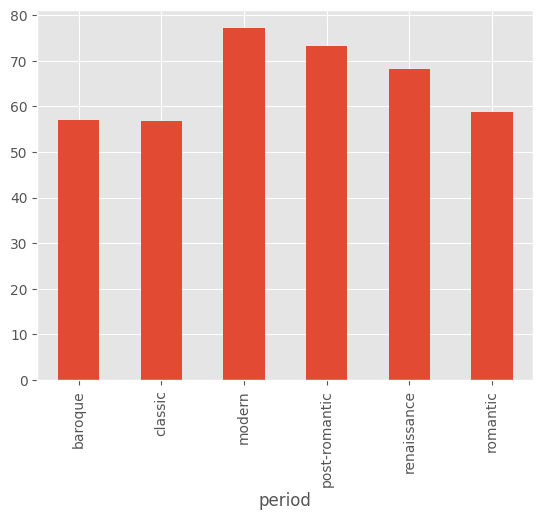

In [220]:
composers.groupby('period')['age'].mean().plot(kind = 'bar');

The built-in plotting capabilities of Pandas automatically used the indices to label the bars, and also used the series name as a general label.

Using more advanced libraries, we can go further than that and use multiple columns to create complex plots. This will be shown in the next chapter.

# 12. A complete example

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

We have seen now most of the basic features of Pandas including importing data, combining dataframes, aggregating information and plotting it. In this chapter, we are going to re-use these concepts with the real data seen in the [introduction chapter](06-DA_Pandas_introduction.ipynb). We are also going to explore some more advanced plotting libraries that exploit to the maximum dataframe structures.

## 12.1 Importing data

We are importing here two tables provided openly by the Swiss National Science Foundation. One contains a list of all *projects* to which funds have been allocated since 1975. The other table contains a list of all *people* to which funds have been awarded during the same period:

In [223]:
# local import
projects = pd.read_csv(projects_path, sep=';')
persons = pd.read_csv(persons_path, sep=';')

We can have a brief look at both tables:

In [224]:
projects.head(5)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.00,NaN
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.00,NaN
4,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.00,NaN


In [225]:
persons.head(5)

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person
0,a Marca,Davide,male,NaN,NaN,53856,NaN,NaN,NaN,NaN,NaN,36549,NaN
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN
3,Aaberg,Johan,male,NaN,NaN,575257,NaN,NaN,NaN,NaN,NaN,119868,NaN
4,Aahman,Josefin,female,NaN,NaN,629557,NaN,NaN,NaN,NaN,NaN,141014,NaN


We see that the ```persons``` table gives information such as the role of a person in various projects  (applicant, employee etc.), her/his gender etc. The *project* table on the other side gives information such as the period of a grant, how much money was awarded etc.

What if we now wish to know for example:
- How much money is awarded on average depending on gender?
- How long does it typically take for a researcher to go from employee to applicant status on a grant?

We need a way to *link* the two tables, i.e. create a large table where *each row* corresponds to a single *observation* containing information from the two tables such as: applicant, gender, awarded funds, dates etc. We will now go through all necessary steps to achieve that goal.

## 12.2 Merging tables

If each row of the persons table contained a single observation with a single person and a single project (the same person would appear of course multiple times), we could just *join* the two tables based e.g. on the project ID. Unfortunately, in the persons table, each line corresponds to a *single researcher* with all projects IDs lumped together in a list. For example:

In [226]:
persons.iloc[10041]

Last Name                                                                    Bodenmann
First Name                                                                         Guy
Gender                                                                            male
Institute Name                       Lehrstuhl für Klinische Psychologie Kinder/Jug...
Institute Place                                                                 Zürich
Person ID SNSF                                                                   47670
OCRID                                                              0000-0003-0964-6409
Projects as responsible Applicant    46820;56660;62901;109547;115948;128960;129627;...
Projects as Applicant                                             112141;122090;166348
Projects as Partner                                                                NaN
Projects as Practice Partner                                                       NaN
Projects as Employee                       

In [227]:
persons.iloc[10041]['Projects as responsible Applicant']

'46820;56660;62901;109547;115948;128960;129627;129699;133004;146775;147634;173270'

Therefore the first thing we need to do is to split those strings into actual lists. We can do that by using classic Python string splitting. We simply ```apply``` that function to the relevant columns. We need to take care of rows containing NaNs on which we cannot use ```split()```. We create two series, one for applicants, one for employees:

In [228]:
projID_a = persons['Projects as responsible Applicant'].apply(lambda x: x.split(';') if not pd.isna(x) else np.nan)
projID_e = persons['Projects as Employee'].apply(lambda x: x.split(';') if not pd.isna(x) else np.nan)

In [261]:
projID_a

0                                             NaN
1                                         [67368]
2                                        [191432]
3                                             NaN
4                                             NaN
                           ...                   
110811    [52821, 143769, 147153, 165510, 183584]
110812                                        NaN
110813                                        NaN
110814                                        NaN
110815                                        NaN
Name: Projects as responsible Applicant, Length: 110816, dtype: object

In [229]:
projID_a[10041]

['46820',
 '56660',
 '62901',
 '109547',
 '115948',
 '128960',
 '129627',
 '129699',
 '133004',
 '146775',
 '147634',
 '173270']

Now, to avoid problems later we'll only keep rows that are not NaNs. We first add the two series to the dataframe and then remove NaNs:

In [230]:
pd.isna(projID_a)

0          True
1         False
2         False
3          True
4          True
          ...  
110811    False
110812     True
110813     True
110814     True
110815     True
Name: Projects as responsible Applicant, Length: 110816, dtype: bool

In [231]:
applicants = persons.copy()
applicants['projID'] = projID_a
applicants = applicants[~pd.isna(projID_a)]

employees = persons.copy()
employees['projID'] = projID_e
employees = employees[~pd.isna(projID_e)]

Now we want each of these projects to become a single line in the dataframe. Here we use a function that we haven't used before called ```explode``` which turns every element in a list into a row (a good illustration of the variety of available functions in Pandas):

In [232]:
applicants = applicants.explode('projID')
employees = employees.explode('projID')

In [233]:
applicants.head(5)

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN,67368
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN,191432
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,8532
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,9513
11,Aas,Gregor,male,Lehrstuhl für Pflanzenphysiologie Universität ...,Bayreuth,36412,NaN,52037,NaN,NaN,NaN,NaN,NaN,52037


So now we have one large table, where each row corresponds to a *single* applicant and a *single* project. We can finally do our merging operation where we combined information on persons and projects. We will do two such operations: one for applicants using the ```projID_a``` column for merging and one using the ```projID_e``` column. We have one last problem to fix:

In [234]:
applicants.loc[1].projID

'67368'

In [235]:
projects.loc[1]['Project Number']

4

We need the project ID in the persons table to be a *number* and not a *string*. We can try to convert but get an error:

In [236]:
applicants.projID = applicants.projID.astype(int)
employees.projID = employees.projID.astype(int)

ValueError: invalid literal for int() with base 10: ''

It looks like we have a row that doesn't conform to expectation and only contains ''. Let's try to figure out what happened. First we find the location with the issue:

In [237]:
applicants[applicants.projID=='']

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID
50947,Kleinewefers,Henner,male,"Séminaire de politique économique, d'économie ...",Fribourg,10661,NaN,8;,NaN,NaN,NaN,NaN,NaN,
62384,Massarenti,Léonard,male,Faculté de Psychologie et des Sciences de l'Ed...,Genève 4,11138,NaN,4;,NaN,NaN,NaN,NaN,NaN,


Then we look in the original table:

In [238]:
persons.loc[50947]

Last Name                                                                 Kleinewefers
First Name                                                                      Henner
Gender                                                                            male
Institute Name                       Séminaire de politique économique, d'économie ...
Institute Place                                                               Fribourg
Person ID SNSF                                                                   10661
OCRID                                                                              NaN
Projects as responsible Applicant                                                   8;
Projects as Applicant                                                              NaN
Projects as Partner                                                                NaN
Projects as Practice Partner                                                       NaN
Projects as Employee                       

Unfortunately, as is often the case, we have a misformatting in the original table. The project as applicant entry has a single number but still contains the ```;``` sign. Therefore when we split the text, we end up with ```['8','']```. Can we fix this? We can for example filter the table and remove rows where ```projID``` has length 0:

In [239]:
applicants = applicants[applicants.projID.apply(lambda x: len(x) > 0)]
employees = employees[employees.projID.apply(lambda x: len(x) > 0)]

Now we can convert the ```projID``` column to integer:

In [240]:
applicants.projID = applicants.projID.astype(int)
employees.projID = employees.projID.astype(int)

Finally we can use ```merge``` to combine both tables. We will combine the projects (on 'Project Number') and persons table (on 'projID_a' and 'projID_e'): 

In [241]:
merged_appl = pd.merge(applicants, projects, left_on='projID', right_on='Project Number')
merged_empl = pd.merge(employees, projects, left_on='projID', right_on='Project Number')

In [242]:
applicants.head(5)

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN,67368
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN,191432
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,8532
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,9513
11,Aas,Gregor,male,Lehrstuhl für Pflanzenphysiologie Universität ...,Bayreuth,36412,NaN,52037,NaN,NaN,NaN,NaN,NaN,52037


## 12.3 Reformatting columns: time

We now have in those tables information on both scientists and projects. Among other things we now when each project of each scientist has started via the ```Start Date``` column:

In [243]:
merged_empl['Start Date']

0         01.04.1993
1         01.04.1993
2         01.04.1993
3         01.04.1993
4         01.04.1993
             ...    
127126    01.04.1990
127127    01.04.1991
127128    01.11.1998
127129    01.11.1992
127130    01.10.2008
Name: Start Date, Length: 127131, dtype: object

If we want to do computations with dates (e.g. measuring time spans) we have to change the type of the column. Currently it is indeed just a string. We could parse that string, but Pandas already offers tools to handle dates. For example we can use ```pd.to_datetime``` to transform the string into a Python ```datetime``` format. Let's create a new ```date``` column:

In [247]:
merged_empl['date'] = pd.to_datetime(merged_empl['Start Date'], dayfirst=True)
merged_appl['date'] = pd.to_datetime(merged_appl['Start Date'], dayfirst=True)

In [248]:
merged_empl.iloc[0]['date']

Timestamp('1993-04-01 00:00:00')

In [249]:
merged_empl.iloc[0]['date'].year

1993

Let's add a year column to our dataframe:

In [250]:
merged_empl['year'] = merged_empl.date.apply(lambda x: x.year)
merged_appl['year'] = merged_appl.date.apply(lambda x: x.year)

## 12.4 Completing information

As we did in the introduction, we want to be able to broadly classify projects into three categories. We therefore search for a specific string ('Humanities', 'Mathematics','Biology') within the 'Discipline Name Hierarchy' column to create a new column called 'Field'^:

In [252]:
science_types = ['Humanities', 'Mathematics', 'Biology']


def get_field (full_field):
    if type(full_field) != str:
        return None
    for field in science_types:
        if field in full_field:
            return field

merged_appl['Field'] = merged_appl['Discipline Name Hierarchy'].apply(get_field)                                        

We will use the amounts awarded in our analysis. Let's look at that column:

In [253]:
merged_appl['Approved Amount']

0                       20120.00
1        data not included in P3
2                      211427.00
3                      174021.00
4                        8865.00
                  ...           
74650                  150524.00
74651                  346000.00
74652                  262960.00
74653                  449517.00
74654                 1433628.00
Name: Approved Amount, Length: 74655, dtype: object

Problem: we have rows that are not numerical. Let's coerce that column to numerical:

In [254]:
merged_appl['Approved Amount'] = pd.to_numeric(merged_appl['Approved Amount'], errors='coerce')

In [255]:
merged_appl['Approved Amount']

0          20120.0
1              NaN
2         211427.0
3         174021.0
4           8865.0
           ...    
74650     150524.0
74651     346000.0
74652     262960.0
74653     449517.0
74654    1433628.0
Name: Approved Amount, Length: 74655, dtype: float64

## 12.5 Data anaylsis

We are finally done tidying up our tables so that we can do proper data analysis. We can *aggregate* data to answer some questions.

### 12.5.1 Amounts by gender
 Let's see for example what is the average amount awarded every year, split by gender. We keep only the 'Project funding' category to avoid obscuring the results with large funds awarded for specific projects (PNR etc):

In [256]:
merged_projects = merged_appl[merged_appl['Funding Instrument Hierarchy'] == 'Project funding']

In [257]:
grouped_gender = merged_projects.groupby(['Gender','year'])['Approved Amount'].mean().reset_index()
grouped_gender

,Gender,year,Approved Amount
0,female,1975.0,101433.200000
1,female,1976.0,145017.750000
2,female,1977.0,177826.157895
3,female,1978.0,141489.857143
4,female,1979.0,218496.904762
...,...,...,...
87,male,2016.0,429717.055907
88,male,2017.0,507521.397098
89,male,2018.0,582461.020513
90,male,2019.0,624826.387985


To generate a plot, we use here Seaborn which uses some elements of a grammar of graphics. For example we can assign variables to each "aspect" of our plot. Here x and y axis are year and amount while color ('hue') is the gender. In one line, we can generate a plot that compiles all the information:

<AxesSubplot: xlabel='year', ylabel='Approved Amount'>

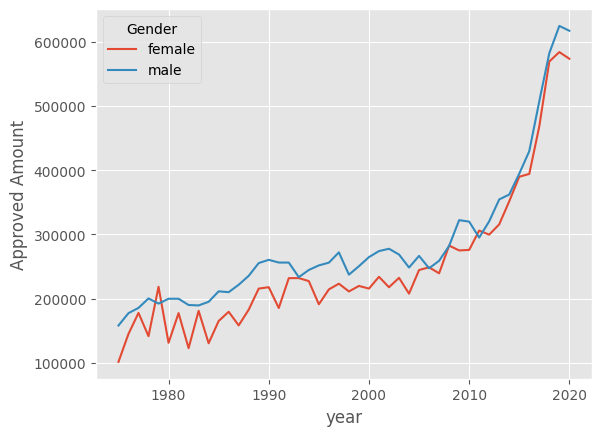

In [258]:
sns.lineplot(data = grouped_gender, x='year', y='Approved Amount', hue='Gender')

There seems to be a small but systematic difference in the average amount awarded.

We can now use a plotting library that is essentially a Python port of ggplot to add even more complexity to this plot. For example, let's split the data also by Field:

In [261]:
import plotnine as p9

In [263]:
grouped_gender_field = merged_projects.groupby(['Gender','year','Field'])['Approved Amount'].mean().reset_index()

In [290]:
grouped_gender_field

,Gender,year,Field,Approved Amount
0,female,1975.0,Biology,95049.000000
1,female,1975.0,Humanities,95451.666667
2,female,1975.0,Mathematics,125762.000000
3,female,1976.0,Biology,183154.200000
4,female,1976.0,Humanities,68590.750000
...,...,...,...,...
271,male,2019.0,Humanities,523397.013072
272,male,2019.0,Mathematics,632188.796040
273,male,2020.0,Biology,694705.243590
274,male,2020.0,Humanities,520925.507246


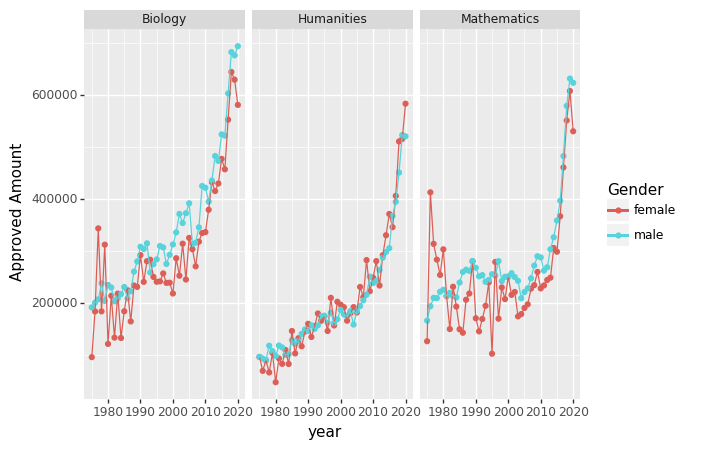

<ggplot: (697433682)>

In [264]:
(p9.ggplot(grouped_gender_field, p9.aes('year', 'Approved Amount', color='Gender'))
 + p9.geom_point()
 + p9.geom_line()
 + p9.facet_wrap('~Field'))

### 12.5.2 From employee to applicant

One of the questions we wanted to answer above was how much time goes by between the first time a scientist is mentioned as "employee" on an application and the first time he applies as main applicant. We have therefore to:
1. Find all rows corresponding to a specific scientist
2. Find the earliest date of project

For (1) we can use ```groupby``` and use the ```Person ID SNSF``` ID which is a unique ID assigned to each researcher. Once this *aggregation* is done, we can summarize each group by looking for the "minimal" date:

In [265]:
first_empl = merged_empl.groupby('Person ID SNSF').date.min().reset_index()
first_appl = merged_appl.groupby('Person ID SNSF').date.min().reset_index()

We have now two dataframes indexed by the ```Person ID```:

In [266]:
first_empl.head(5)

,Person ID SNSF,date
0,1611,1990-10-01
1,1659,1988-11-01
2,1661,1978-07-01
3,1694,1978-06-01
4,1712,1982-04-01


Now we can again merge the two series to be able to compare applicant/employee start dates for single people:

In [269]:
merge_first = pd.merge(first_appl, first_empl, on='Person ID SNSF', suffixes=('_appl', '_empl'))

In [270]:
merge_first

,Person ID SNSF,date_appl,date_empl
0,1659,1975-10-01,1988-11-01
1,1661,1978-07-01,1978-07-01
2,1694,1985-01-01,1978-06-01
3,1712,1982-04-01,1982-04-01
4,1726,1985-03-01,1985-03-01
...,...,...,...
10336,748652,2019-12-01,2019-12-01
10337,748760,2020-03-01,2020-03-01
10338,749430,2020-04-01,2020-04-01
10339,749991,2020-03-01,2020-03-01


Finally we merge with the full table, based on the index to recover the other paramters:

In [271]:
full_table = pd.merge(merge_first, merged_appl,on='Person ID SNSF')

Finally we can add a column to that dataframe as a "difference in dates":

In [274]:
full_table['time_diff'] = full_table.date_appl - full_table.date_empl

In [275]:
full_table.time_diff = full_table.time_diff.apply(lambda x: x.days/365)

array([[<AxesSubplot: title={'center': 'time_diff'}>]], dtype=object)

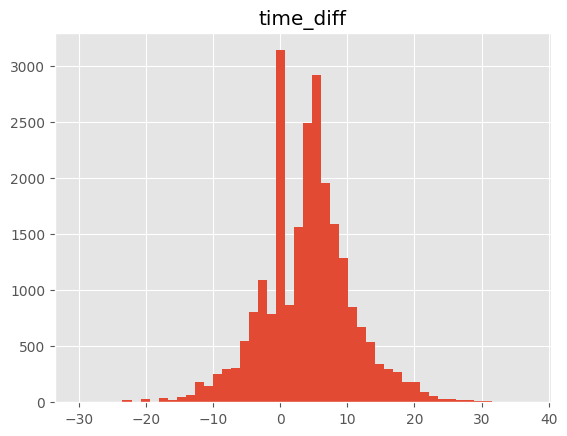

In [277]:
full_table.hist(column='time_diff', bins = 50)

We see that we have one strong peak at $\Delta T==0$ which corresponds to people who were paid for the first time through an SNSF grant when they applied themselves. The remaining cases have a peak around $\Delta T==5$ which typically corresponds to the case where a PhD student was payed on a grant and then applied for a postdoc grant ~4-5 years later.

We can go further and ask how dependent this waiting time is on the Field of research. Obviously Humanities are structured very differently 

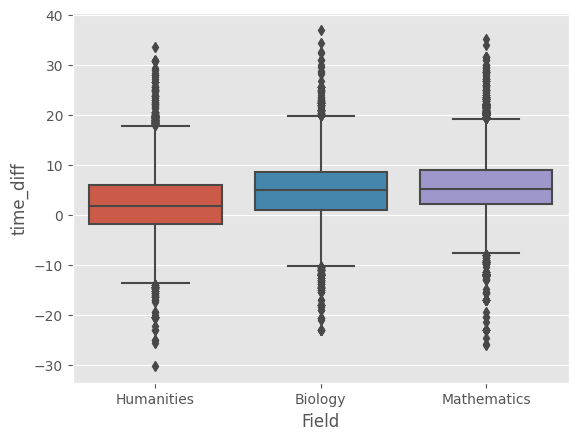

In [278]:
sns.boxplot(data=full_table, y='time_diff', x='Field');

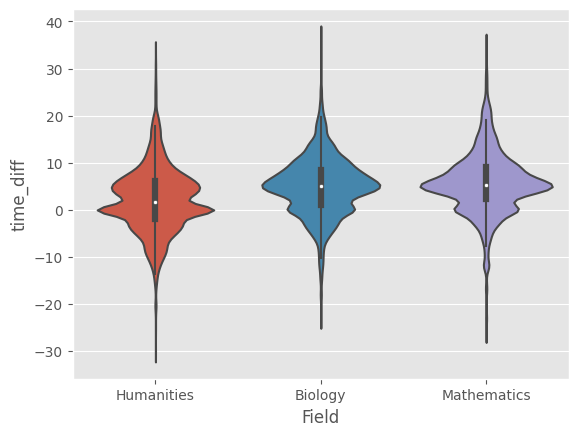

In [280]:
sns.violinplot(data=full_table, y='time_diff', x='Field');

# Exercise

For these exercices we are using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels) provided by Airbnb for a Kaggle competition. It describes its offer for New York City in 2019, including types of appartments, price, location etc.

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Create a dataframe 
- Create a dataframe of a few lines with objects and their properties (e.g fruits, their weight and colour).

- Calculate the mean of your Dataframe.

## 2. Import
- Import the table called ```AB_NYC_2019.csv``` as a dataframe.

In [308]:
ab_nyc_path = 'https://raw.githubusercontent.com/emiliomartin84/Machine_Learning_Uc3m/main/Data/AB_NYC_2019.csv'

- Have a look at the beginning of the table (head).

- Create a histogram of prices.

## 3. Operations

- Create a new column in the dataframe by multiplying the `price` and `availability_365` columns to get an estimate of the maximum yearly income.

## 4. Subselection and plotting
- Create a new Dataframe by first subselecting yearly incomes between 1 and 100,000 and then by suppressing cases with 0 reviews. 

- Make a scatter plot of yearly income versus number of reviews.

## 4. Combine

We provide below and additional table that contains the number of inhabitants of each of New York's boroughs (`neighbourhood_group` in the table).
- Use ```merge``` to add this population information to each element in the original dataframe.

## 5. Groups

- Using ```groupby``` calculate the average price for each type of room (room_type) in each neighbourhood_group. What is the average price for an entire home in Brooklyn ?

- Unstack the multi-level Dataframe into a regular Dataframe with ```unstack()``` and create a bar plot with the resulting table.

## 6. Advanced plotting

- Using Seaborn, create a scatter plot where x and y positions are longitude and lattitude, the color reflects price and the shape of the marker the borough (neighbourhood_group). Can you recognize parts of new york? Does the map make sense?

## References 

- [1] Adapted from https://github.com/guiwitz/NumpyPandas_course
- [2] https://github.com/PacktPublishing/Pandas-Cookbook-Second-Edition